In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [36]:
nyc1 = pd.read_csv('NYC_2019.csv')
nyc1.head()
#nyc1.dtypes

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [37]:
nyc1['number_of_reviews'].describe().apply("{0:.2f}".format)

count    48895.00
mean        23.27
std         44.55
min          0.00
25%          1.00
50%          5.00
75%         24.00
max        629.00
Name: number_of_reviews, dtype: object

In [38]:
nyc1.drop(['name', 'host_name'], axis = 1, inplace=True)
nyc1.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [39]:
brook = nyc1[nyc1['neighbourhood_group'].str.contains("Brooklyn")]
manhat = nyc1[nyc1['neighbourhood_group'].str.contains("Manhattan")]
queens = nyc1[nyc1['neighbourhood_group'].str.contains("Queens")]
staten = nyc1[nyc1['neighbourhood_group'].str.contains("Staten Island")]
bronx = nyc1[nyc1['neighbourhood_group'].str.contains("Bronx")]

In [40]:
brook_reviews = brook.sort_values(by = 'number_of_reviews', ascending = False)
brook_reviews.drop(['last_review', 'calculated_host_listings_count'], axis = 1, inplace=True)
brook_reviews.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
4870,3474320,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,269
471,166172,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,0
113,26785,42273,Brooklyn,South Slope,40.66853,-73.98912,Entire home/apt,120,30,467,4.22,192
137,31994,137814,Brooklyn,Clinton Hill,40.68730,-73.96340,Private room,76,2,426,3.89,275
1547,699472,3587751,Brooklyn,Williamsburg,40.70995,-73.95536,Entire home/apt,220,1,404,4.90,341


In [41]:
manhat_reviews = manhat.sort_values(by = 'number_of_reviews', ascending = False)
manhat_reviews.drop(['last_review', 'calculated_host_listings_count'], axis = 1, inplace=True)
manhat_reviews.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
2031,903972,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,293
2030,903947,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,342
2015,891117,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,339
1879,834190,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,179
225,58059,277379,Manhattan,Harlem,40.82510,-73.94287,Private room,60,1,458,4.58,258


In [42]:
queens_reviews = queens.sort_values(by = 'number_of_reviews', ascending = False)
queens_reviews.drop(['last_review', 'calculated_host_listings_count'], axis = 1, inplace=True)
queens_reviews.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
11759,9145202,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,333
13495,10101135,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,173
10623,8168619,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,163
20403,16276632,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,341
1271,546383,2680820,Queens,Flushing,40.75578,-73.81948,Private room,55,1,474,5.53,332


In [43]:
staten_reviews = staten.sort_values(by = 'number_of_reviews', ascending = False)
staten_reviews.drop(['last_review', 'calculated_host_listings_count'], axis = 1, inplace=True)
staten_reviews.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
256,63320,303939,Staten Island,Tompkinsville,40.63481,-74.08519,Private room,36,2,333,3.19,340
5387,3892700,46969,Staten Island,Clifton,40.62050,-74.07451,Entire home/apt,70,2,242,4.09,256
4324,2889387,2269517,Staten Island,St. George,40.64270,-74.08001,Private room,95,2,234,3.74,264
6941,4974843,25641892,Staten Island,West Brighton,40.63182,-74.12400,Entire home/apt,70,2,196,3.63,231
249,62452,303939,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36,2,193,1.85,360


In [44]:
bronx_reviews = bronx.sort_values(by = 'number_of_reviews', ascending = False)
bronx_reviews.drop(['last_review', 'calculated_host_listings_count'], axis = 1, inplace=True)
bronx_reviews.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
5260,3802218,19533769,Bronx,Mott Haven,40.80772,-73.91791,Private room,53,1,321,5.46,44
1965,858695,4494343,Bronx,Mount Eden,40.84058,-73.91382,Private room,30,2,291,3.69,208
5241,3790118,17292935,Bronx,Mott Haven,40.81050,-73.92507,Private room,55,1,276,4.63,19
510,182177,873273,Bronx,Allerton,40.86466,-73.85709,Entire home/apt,125,2,271,2.84,347
23371,18914730,1776707,Bronx,Throgs Neck,40.83051,-73.82511,Entire home/apt,95,1,266,10.34,345


In [45]:
nyc_clean = nyc1.copy()
nyc_clean.drop(['neighbourhood','last_review','calculated_host_listings_count'], axis = 1, inplace = True)

# check for missing values 
#nyc_clean.isnull().sum()
nyc_clean.fillna({'reviews_per_month':0}, inplace=True)
nyc_clean.fillna({'number_of_reviews':0}, inplace=True)
#nyc_clean.isnull().sum()

d1 = pd.get_dummies(nyc_clean['neighbourhood_group'])
d2 = pd.get_dummies(nyc_clean['room_type'])
nyc_concat = pd.concat([nyc_clean, d1, d2], axis = 1)
nyc_concat.head()

,id,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,2539,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,365,0,1,0,0,0,0,1,0
1,2595,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355,0,0,1,0,0,1,0,0
2,3647,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,365,0,0,1,0,0,0,1,0
3,3831,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194,0,1,0,0,0,1,0,0
4,5022,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0,0,0,1,0,0,1,0,0


In [46]:
nyc_clean['number_of_reviews'] = (nyc_clean['number_of_reviews'] > 24)*1
y = nyc_clean[['number_of_reviews']]
y.shape

(48895, 1)

In [47]:
feature_names = ['price','minimum_nights','availability_365',
                 'Brooklyn','Manhattan','Queens','Staten Island','Bronx',
                 'Entire home/apt','Private room','Shared room']
X = nyc_concat[feature_names]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train.values.ravel())
print("lr.coef_:", logreg.coef_)
print("lr.intercept_:", logreg.intercept_)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

lr.coef_: [[-0.57743791 -1.33415686  0.55042331  0.00989122 -0.01210284  0.00366043
   0.00686128 -0.00423358  0.11268254 -0.07836202 -0.11426677]]
lr.intercept_: [-1.31014777]
Training set score: 0.748
Test set score: 0.757


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

opt_tree = DecisionTreeClassifier(random_state = 0)
param_DT = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,10)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5)
grid_tree.fit(X_train,y_train)
print(grid_tree.best_params_)
print(grid_tree.score(X_test,y_test))

DecisionTreeClassifier(random_state=0)

Accuracy on training set: 0.970
Accuracy on test set: 0.741


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 10)})

{'max_depth': 6, 'max_leaf_nodes': 8, 'min_samples_split': 2}
0.7798592931937173


In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

KNeighborsClassifier()

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.76


In [61]:
from sklearn import model_selection
seed = 7

models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.729303 (0.090043)
DTC: 0.718293 (0.052527)
KNN: 0.734656 (0.051835)


In [62]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[6923 2400]
 [1500 1401]]


In [63]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score: {:.4f}'.format(precision_score(y_test,y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_pred)))

Precision score: 0.3686
Recall score: 0.4829
Accuracy score: 0.6810
F1 score: 0.4181


Text(0, 0.5, 'Recall')

Text(0.5, 0, '1-specificity')

Text(0.5, 1.0, 'LogReg ROC Curve')

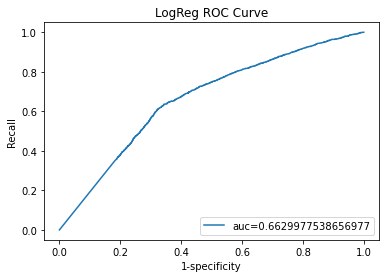

AUC for logistic regression: 0.663


In [64]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

from sklearn.metrics import roc_curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('LogReg ROC Curve')
plt.show()

print("AUC for logistic regression: {:.3f}".format(lr_auc))

Text(0, 0.5, 'Recall')

Text(0.5, 0, '1-specificity')

Text(0.5, 1.0, 'DTC ROC Curve')

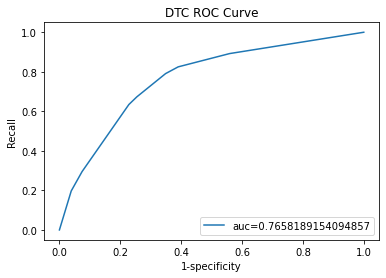

AUC for decision tree: 0.766


In [65]:
y_pred2 = grid_tree.predict(X_test)
dtc_auc = roc_auc_score(y_test, grid_tree.predict_proba(X_test)[:,1])

y_pred2_proba = grid_tree.predict_proba(X_test)[::,1]

fpr, tpr, threshold = roc_curve(y_test,  y_pred2_proba)
auc = roc_auc_score(y_test, y_pred2_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('DTC ROC Curve')
plt.show()

print("AUC for decision tree: {:.3f}".format(dtc_auc))

Text(0, 0.5, 'Recall')

Text(0.5, 0, '1-specificity')

Text(0.5, 1.0, 'KNN ROC Curve')

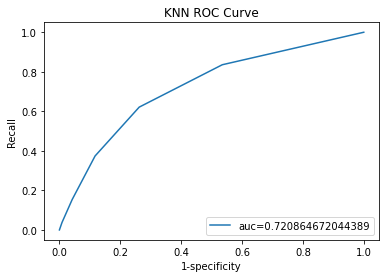

AUC for K-NN: 0.721


In [66]:
y_pred3 = knn.predict(X_test)
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])

y_pred3_proba = knn.predict_proba(X_test)[::,1]

fpr, tpr, threshold = roc_curve(y_test,  y_pred3_proba)
auc = roc_auc_score(y_test, y_pred3_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('KNN ROC Curve')
plt.show()

print("AUC for K-NN: {:.3f}".format(knn_auc))